# Graphs of functions and results in python

Plots of some of my used functions.

### Plotting activation functions

In [248]:
import pandas as pd
import math 
import matplotlib.pyplot as plt
import numpy as np
import math
  
x = np.linspace(-2.5, 2.5, 200)

##### Sigmoid

In [249]:
y_sigmoid = 1/(1 + np.exp(-x))

##### Tanh

In [250]:
y_tanh = (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

##### Relu

In [251]:
y_relu = np.maximum(0,x)

##### Linear

In [252]:
y_lin = x

##### Step

In [253]:
y_step = (x >= 0).astype(float)

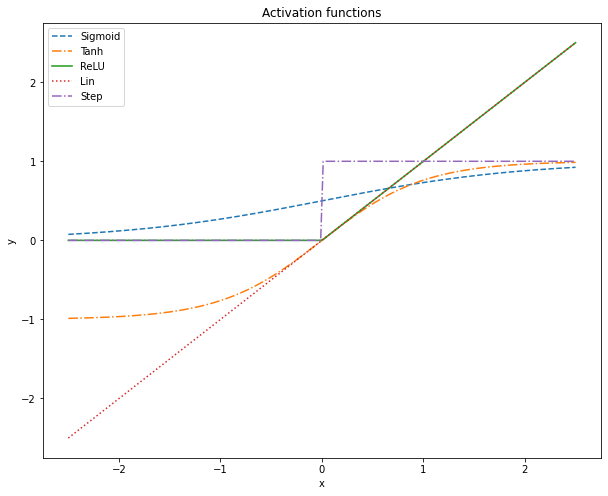

In [254]:
plt.figure(figsize=(10,8))
plt.plot(x, y_sigmoid,"--", label = "Sigmoid")
plt.plot(x, y_tanh,'-.', label = "Tanh")
plt.plot(x, y_relu, label = "ReLU", lw=1.6)
plt.plot(x, y_lin, ':', label = "Lin")
plt.plot(x, y_step, "-.", label = "Step")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Activation functions")
plt.legend()
  
plt.show()

## Plot BTC-BUSD 

In [255]:
BTC_df =  pd.read_csv("crypto_data/btc-usd-max.csv", index_col="snapped_at", parse_dates=True)

In [256]:
BTC_df = BTC_df[["price"]]
BTC_df_2017_now = BTC_df.loc["2017-09-01":"2018-06-14"]
BTC_df_downloaded = BTC_df.loc["2018-06-14":"2018-08-25"].copy()
BTC_df_downloaded.rename(columns={"price":"downloaded_df"}, inplace=True)
BTC_df_collected = BTC_df.loc["2020-09-28":"2020-11-08"].copy()
BTC_df_collected.rename(columns={"price":"collected_df"}, inplace=True)
BTC_df_final = BTC_df.loc["2021-02-01":"2021-07-01"].copy()
BTC_df_final.rename(columns={"price":"final_df"}, inplace=True)

In [257]:
BTC_to_plot = pd.concat([BTC_df.loc["2017-09-01":"2018-06-14"], BTC_df_downloaded, BTC_df.loc["2018-08-25":"2020-09-28"], BTC_df_collected, BTC_df.loc["2020-11-08":"2021-02-01"], BTC_df_final, BTC_df.loc["2021-07-01":]])

<AxesSubplot:xlabel='Datetime', ylabel='Price [$]'>

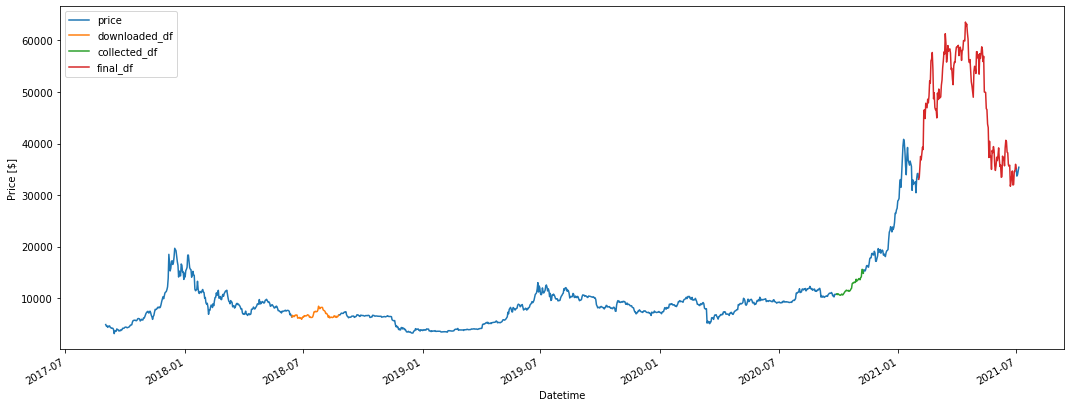

In [258]:
BTC_to_plot.plot(figsize=(18,7), xlabel="Datetime", ylabel="Price [$]")

## Plot collected dataframe evaluation parts

In [259]:
path = 'crypto_data/my_dataset_csv.csv'               

my_df = pd.read_csv(path, index_col="Datetime", parse_dates=True)  
my_df.fillna(method="ffill", inplace=True)
BTC_df = my_df[["BTC-USD_close"]]

In [261]:
BTC_df_recent = BTC_df[52553:].copy()
BTC_df_recent.rename(columns={"BTC-USD_close":"Recent"}, inplace=True)

BTC_df_eval = BTC_df[:9000].copy()
BTC_df_eval.rename(columns={"BTC-USD_close":"My evaluation"}, inplace=True)

In [262]:
MY_df_eval = pd.concat([BTC_df_recent,BTC_df[9000:52553] ,BTC_df_eval])

<AxesSubplot:xlabel='Datetime', ylabel='Price [$]'>

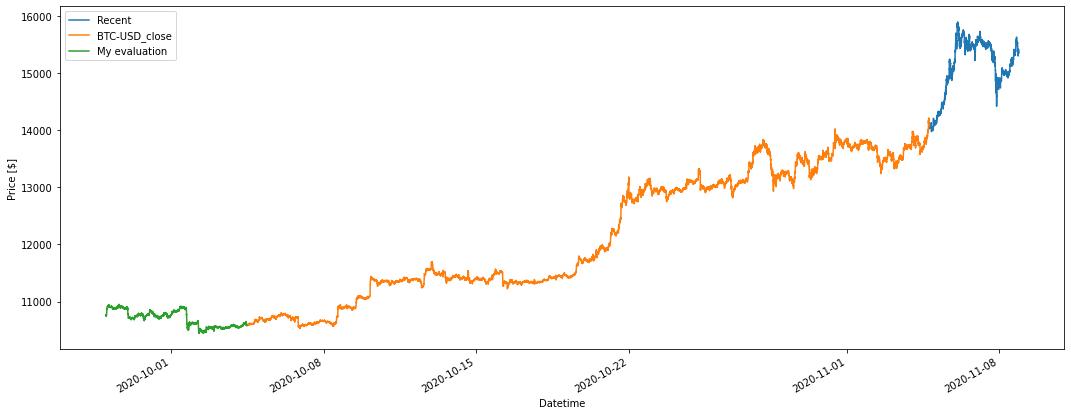

In [263]:
MY_df_eval.plot(figsize=(18,7), ylabel="Price [$]")

## Plot model results


### PCT models

In [264]:
pct_results = pd.read_excel("models_comparsion.xlsx" , skiprows = 158, nrows= 125, usecols="D:K,U")  
pct_results.dropna(thresh=3, inplace=True)

In [265]:
pct_results.fillna(method='ffill', inplace=True)

In [266]:
pct_results.rename(columns={"Loss":"val_loss","MAE ":"val_MAE","Loss.1":"test_loss","MAE .1":"test_MAE","Loss.2":"recent_loss","MAE":"recent_MAE","Unnamed: 20":"Model_name", "Directory":"Directory_name"}, inplace=True)

In [267]:
pct_results

,Cells,val_loss,val_MAE,test_loss,test_MAE,recent_loss,recent_MAE,Compile_settings,Directory_name
0,LSTM,1.34198,0.60758,1.00610,0.48238,2.76760,0.84872,comp_3,07_04_2021
1,LSTM - bidirectional,0.05691,0.05396,0.04240,0.04225,0.11895,0.08173,comp_3,07_04_2021
2,GRU,1.31590,0.61859,1.02110,0.49510,2.85470,0.91725,comp_3,07_04_2021
3,GRU - bidirectional,0.05630,0.04599,0.04180,0.03786,0.11321,0.06480,comp_3,07_04_2021
4,LSTM (single),1.28091,0.59396,0.96560,0.46532,2.62700,0.80479,comp_3,07_04_2021
...,...,...,...,...,...,...,...,...,...
120,GRU - bidirectional,0.07136,0.08051,0.04836,0.07081,0.13230,0.10603,comp_14,28_04_2021
121,LSTM (single),1.29268,0.57493,0.98069,0.44770,2.57038,0.70306,comp_14,28_04_2021
122,LSTM - bidirectional (single),1.26566,0.58575,0.95762,0.46084,2.58836,0.74278,comp_14,28_04_2021
123,GRU (single),1.28477,0.58714,0.97294,0.46958,2.57291,0.72771,comp_14,28_04_2021


#### LSTM 

Best lstm models from results below:

- 08_04_2021
- 17_04_2021

In [268]:
lstm_res = pct_results[pct_results["Cells"] == "LSTM"]

In [269]:
lstm_res = lstm_res[lstm_res["Directory_name"] != "10_04_2021"] # remove logcosh
lstm_res = lstm_res[lstm_res["Directory_name"] != "19_04_2021"]

In [270]:
lstm_res[["Directory_name","val_loss","val_MAE","test_loss","test_MAE","recent_loss","recent_MAE"]].style.background_gradient(cmap="RdYlGn_r", axis="rows")

,Directory_name,val_loss,val_MAE,test_loss,test_MAE,recent_loss,recent_MAE
0,07_04_2021,1.341980,0.607580,1.006100,0.482380,2.767600,0.848720
9,07_04_2021_1,1.292810,0.590240,0.992900,0.466560,2.647300,0.809200
18,07_04_2021_2,1.281000,0.594440,0.973900,0.468290,2.624900,0.791200
27,08_04_2021,1.293280,0.568750,0.978200,0.436050,2.570800,0.694250
36,09_04_2021,1.276800,0.589980,0.971900,0.464300,2.631200,0.794200
54,12_04_2021,1.313900,0.597650,1.032500,0.480200,2.781800,0.840700
63,13_04_2021,1.282260,0.596620,0.985300,0.473480,2.686300,0.824380
72,14_04_2021,1.293050,0.570030,0.978500,0.437900,2.569700,0.698610
81,17_04_2021,1.270800,0.594600,0.971200,0.468540,2.641400,0.810060
90,18_04_2021,1.292200,0.571300,0.978390,0.439960,2.569410,0.702550


highlight low

In [271]:
lstm_res[["Directory_name","val_loss","val_MAE","test_loss","test_MAE","recent_loss","recent_MAE"]].style.highlight_min(color="#98FB98")

,Directory_name,val_loss,val_MAE,test_loss,test_MAE,recent_loss,recent_MAE
0,07_04_2021,1.341980,0.607580,1.006100,0.482380,2.767600,0.848720
9,07_04_2021_1,1.292810,0.590240,0.992900,0.466560,2.647300,0.809200
18,07_04_2021_2,1.281000,0.594440,0.973900,0.468290,2.624900,0.791200
27,08_04_2021,1.293280,0.568750,0.978200,0.436050,2.570800,0.694250
36,09_04_2021,1.276800,0.589980,0.971900,0.464300,2.631200,0.794200
54,12_04_2021,1.313900,0.597650,1.032500,0.480200,2.781800,0.840700
63,13_04_2021,1.282260,0.596620,0.985300,0.473480,2.686300,0.824380
72,14_04_2021,1.293050,0.570030,0.978500,0.437900,2.569700,0.698610
81,17_04_2021,1.270800,0.594600,0.971200,0.468540,2.641400,0.810060
90,18_04_2021,1.292200,0.571300,0.978390,0.439960,2.569410,0.702550


#### LSTM - bidi 

Best models from results below:

- 13_04_2021
- 17_04_2021

In [272]:
lstm_bidi_res = pct_results[pct_results["Cells"] == "LSTM - bidirectional"]

Exclude models 19_04_2021_1 and 14_04_2021 (very bad and different results).

In [273]:
lstm_bidi_res = lstm_bidi_res[lstm_bidi_res["Directory_name"] != "19_04_2021"]
lstm_bidi_res = lstm_bidi_res[lstm_bidi_res["Directory_name"] != "14_04_2021"]
lstm_bidi_res = lstm_bidi_res[lstm_bidi_res["Directory_name"] != "10_04_2021"]

In [274]:
lstm_bidi_res[["Directory_name","val_loss","val_MAE","test_loss","test_MAE","recent_loss","recent_MAE"]].style.background_gradient(cmap="RdYlGn_r", axis="rows")

,Directory_name,val_loss,val_MAE,test_loss,test_MAE,recent_loss,recent_MAE
1,07_04_2021,0.056910,0.053960,0.042400,0.042250,0.118950,0.081730
10,07_04_2021_1,0.055300,0.047010,0.041900,0.038490,0.113120,0.062880
19,07_04_2021_2,0.070080,0.066770,0.047300,0.051770,0.141980,0.109870
28,08_04_2021,0.067020,0.064340,0.046300,0.050750,0.141800,0.105700
37,09_04_2021,0.055700,0.044360,0.041500,0.037500,0.115400,0.062900
55,12_04_2021,0.059900,0.068110,0.044200,0.054640,0.119800,0.093520
64,13_04_2021,0.055840,0.037850,0.042200,0.030600,0.111740,0.051660
82,17_04_2021,0.055000,0.039400,0.041500,0.031260,0.111700,0.058430
91,18_04_2021,0.060090,0.060200,0.043070,0.047980,0.122410,0.091350
109,20_04_2021,0.056700,0.043910,0.041600,0.034700,0.114420,0.064570


highlight low

In [275]:
lstm_bidi_res[["Directory_name","val_loss","val_MAE","test_loss","test_MAE","recent_loss","recent_MAE"]].style.highlight_min(color="#98FB98")

,Directory_name,val_loss,val_MAE,test_loss,test_MAE,recent_loss,recent_MAE
1,07_04_2021,0.056910,0.053960,0.042400,0.042250,0.118950,0.081730
10,07_04_2021_1,0.055300,0.047010,0.041900,0.038490,0.113120,0.062880
19,07_04_2021_2,0.070080,0.066770,0.047300,0.051770,0.141980,0.109870
28,08_04_2021,0.067020,0.064340,0.046300,0.050750,0.141800,0.105700
37,09_04_2021,0.055700,0.044360,0.041500,0.037500,0.115400,0.062900
55,12_04_2021,0.059900,0.068110,0.044200,0.054640,0.119800,0.093520
64,13_04_2021,0.055840,0.037850,0.042200,0.030600,0.111740,0.051660
82,17_04_2021,0.055000,0.039400,0.041500,0.031260,0.111700,0.058430
91,18_04_2021,0.060090,0.060200,0.043070,0.047980,0.122410,0.091350
109,20_04_2021,0.056700,0.043910,0.041600,0.034700,0.114420,0.064570


In [276]:
to_plot_lstm_bidi = lstm_bidi_res[["val_loss","val_MAE","test_loss","test_MAE","recent_MAE","recent_loss"]]

#### GRU

Best models from results below:

- 14_04_2021	
- 12_04_2021
- 08_04_2021

In [277]:
gru_res = pct_results[pct_results["Cells"] == "GRU"]

In [278]:
gru_res = gru_res[gru_res["Directory_name"] != "10_04_2021"] # remove logcosh
gru_res = gru_res[gru_res["Directory_name"] != "19_04_2021"]

In [279]:
gru_res[["Directory_name","val_loss","val_MAE","test_loss","test_MAE","recent_loss","recent_MAE"]].style.background_gradient(cmap="RdYlGn_r", axis="rows")

,Directory_name,val_loss,val_MAE,test_loss,test_MAE,recent_loss,recent_MAE
2,07_04_2021,1.315900,0.618590,1.021100,0.495100,2.854700,0.917250
11,07_04_2021_1,1.318180,0.601540,1.008900,0.476700,2.715600,0.848110
20,07_04_2021_2,1.278960,0.591250,0.964300,0.464670,2.607200,0.777700
29,08_04_2021,1.289860,0.576860,0.973600,0.444840,2.570200,0.715100
38,09_04_2021,1.283500,0.595390,0.970600,0.469500,2.629700,0.789200
56,12_04_2021,1.271070,0.593060,0.970200,0.474220,2.594900,0.758050
65,13_04_2021,1.294920,0.607780,0.973800,0.478440,2.688000,0.832800
74,14_04_2021,1.288300,0.575860,0.973000,0.443980,2.573800,0.725800
83,17_04_2021,1.277400,0.597050,0.978100,0.471540,2.665600,0.824910
92,18_04_2021,1.282400,0.593700,0.978430,0.469860,2.644310,0.798830


highlight low

In [280]:
gru_res[["Directory_name","val_loss","val_MAE","test_loss","test_MAE","recent_loss","recent_MAE"]].style.highlight_min(color="#98FB98")

,Directory_name,val_loss,val_MAE,test_loss,test_MAE,recent_loss,recent_MAE
2,07_04_2021,1.315900,0.618590,1.021100,0.495100,2.854700,0.917250
11,07_04_2021_1,1.318180,0.601540,1.008900,0.476700,2.715600,0.848110
20,07_04_2021_2,1.278960,0.591250,0.964300,0.464670,2.607200,0.777700
29,08_04_2021,1.289860,0.576860,0.973600,0.444840,2.570200,0.715100
38,09_04_2021,1.283500,0.595390,0.970600,0.469500,2.629700,0.789200
56,12_04_2021,1.271070,0.593060,0.970200,0.474220,2.594900,0.758050
65,13_04_2021,1.294920,0.607780,0.973800,0.478440,2.688000,0.832800
74,14_04_2021,1.288300,0.575860,0.973000,0.443980,2.573800,0.725800
83,17_04_2021,1.277400,0.597050,0.978100,0.471540,2.665600,0.824910
92,18_04_2021,1.282400,0.593700,0.978430,0.469860,2.644310,0.798830


#### GRU - bidirectional 

Best gru bidirectional models from results below:

- 07_04_2021_1
- 17_04_2021

In [281]:
gru_bidi_res = pct_results[pct_results["Cells"] == "GRU - bidirectional"]

Exclude models 19_04_2021_1 and 14_04_2021 and 12_04_2021 (very diff results).

In [282]:
gru_bidi_res = gru_bidi_res[gru_bidi_res["Directory_name"] != "19_04_2021"]
gru_bidi_res = gru_bidi_res[gru_bidi_res["Directory_name"] != "12_04_2021"]
gru_bidi_res = gru_bidi_res[gru_bidi_res["Directory_name"] != "10_04_2021"]

In [283]:
gru_bidi_res[["Directory_name","val_loss","val_MAE","test_loss","test_MAE","recent_loss","recent_MAE"]].style.background_gradient(cmap="RdYlGn_r", axis="rows")

,Directory_name,val_loss,val_MAE,test_loss,test_MAE,recent_loss,recent_MAE
3,07_04_2021,0.056300,0.045990,0.041800,0.037860,0.113210,0.064800
12,07_04_2021_1,0.056460,0.040100,0.042300,0.031780,0.113500,0.058430
21,07_04_2021_2,0.067280,0.061250,0.044400,0.045590,0.141640,0.101970
30,08_04_2021,0.064000,0.058680,0.043900,0.044420,0.139300,0.098400
39,09_04_2021,0.056200,0.041290,0.041200,0.032700,0.117700,0.064300
66,13_04_2021,0.056200,0.044420,0.042800,0.035790,0.114510,0.064230
75,14_04_2021,0.074900,0.090230,0.052600,0.073050,0.144900,0.135900
84,17_04_2021,0.055180,0.041740,0.041300,0.033260,0.112400,0.059830
93,18_04_2021,0.061740,0.065690,0.044390,0.050420,0.125730,0.100940
111,20_04_2021,0.055810,0.041570,0.041360,0.032170,0.114460,0.065750


highlight low

In [284]:
gru_bidi_res[["Directory_name","val_loss","val_MAE","test_loss","test_MAE","recent_loss","recent_MAE"]].style.highlight_min(color="#98FB98")

,Directory_name,val_loss,val_MAE,test_loss,test_MAE,recent_loss,recent_MAE
3,07_04_2021,0.056300,0.045990,0.041800,0.037860,0.113210,0.064800
12,07_04_2021_1,0.056460,0.040100,0.042300,0.031780,0.113500,0.058430
21,07_04_2021_2,0.067280,0.061250,0.044400,0.045590,0.141640,0.101970
30,08_04_2021,0.064000,0.058680,0.043900,0.044420,0.139300,0.098400
39,09_04_2021,0.056200,0.041290,0.041200,0.032700,0.117700,0.064300
66,13_04_2021,0.056200,0.044420,0.042800,0.035790,0.114510,0.064230
75,14_04_2021,0.074900,0.090230,0.052600,0.073050,0.144900,0.135900
84,17_04_2021,0.055180,0.041740,0.041300,0.033260,0.112400,0.059830
93,18_04_2021,0.061740,0.065690,0.044390,0.050420,0.125730,0.100940
111,20_04_2021,0.055810,0.041570,0.041360,0.032170,0.114460,0.065750


### Single shot models

#### LSTM single shot

Best lstm models from results below:


- 08_04_2021
- 07_04_2021_1

In [285]:
lstm_res_s = pct_results[pct_results["Cells"] == "LSTM (single)"]

In [286]:
lstm_res_s = lstm_res_s[lstm_res_s["Directory_name"] != "10_04_2021"]
lstm_res_s = lstm_res_s[lstm_res_s["Directory_name"] != "19_04_2021"]

In [287]:
lstm_res_s[["Directory_name","val_loss","val_MAE","test_loss","test_MAE","recent_loss","recent_MAE"]].style.background_gradient(cmap="RdYlGn_r", axis="rows")

,Directory_name,val_loss,val_MAE,test_loss,test_MAE,recent_loss,recent_MAE
4,07_04_2021,1.280910,0.593960,0.965600,0.465320,2.627000,0.804790
13,07_04_2021_1,1.263710,0.590730,0.978500,0.465380,2.652000,0.810990
22,07_04_2021_2,1.286320,0.591280,0.973900,0.463160,2.601170,0.766270
31,08_04_2021,1.293000,0.569320,0.979600,0.437100,2.569800,0.695000
40,09_04_2021,1.292130,0.571960,0.978700,0.440650,2.569000,0.701900
58,12_04_2021,1.292650,0.573610,0.980300,0.445630,2.570300,0.701240
67,13_04_2021,1.267840,0.589160,0.974600,0.465010,2.629600,0.791610
76,14_04_2021,1.292300,0.569830,0.979100,0.437790,2.568000,0.698860
85,17_04_2021,1.292200,0.572100,0.980300,0.443240,2.569800,0.704350
94,18_04_2021,1.292000,0.573240,0.977290,0.440440,2.568120,0.705060


In [288]:
#highlight low

In [289]:
lstm_res_s[["Directory_name","val_loss","val_MAE","test_loss","test_MAE","recent_loss","recent_MAE"]].style.highlight_min(color="#98FB98")

,Directory_name,val_loss,val_MAE,test_loss,test_MAE,recent_loss,recent_MAE
4,07_04_2021,1.280910,0.593960,0.965600,0.465320,2.627000,0.804790
13,07_04_2021_1,1.263710,0.590730,0.978500,0.465380,2.652000,0.810990
22,07_04_2021_2,1.286320,0.591280,0.973900,0.463160,2.601170,0.766270
31,08_04_2021,1.293000,0.569320,0.979600,0.437100,2.569800,0.695000
40,09_04_2021,1.292130,0.571960,0.978700,0.440650,2.569000,0.701900
58,12_04_2021,1.292650,0.573610,0.980300,0.445630,2.570300,0.701240
67,13_04_2021,1.267840,0.589160,0.974600,0.465010,2.629600,0.791610
76,14_04_2021,1.292300,0.569830,0.979100,0.437790,2.568000,0.698860
85,17_04_2021,1.292200,0.572100,0.980300,0.443240,2.569800,0.704350
94,18_04_2021,1.292000,0.573240,0.977290,0.440440,2.568120,0.705060


#### LSTM bidirectional single shot

Best lstm bidirectional single shot models from results below:

- 28_04_2021
- 12_04_2021

In [290]:
lstm_bidi_res_s = pct_results[pct_results["Cells"] == "LSTM - bidirectional (single)"]

In [291]:
lstm_bidi_res_s = lstm_bidi_res_s[lstm_bidi_res_s["Directory_name"] != "10_04_2021"]
lstm_bidi_res_s = lstm_bidi_res_s[lstm_bidi_res_s["Directory_name"] != "19_04_2021"]

In [292]:
lstm_bidi_res_s[["Directory_name","val_loss","val_MAE","test_loss","test_MAE","recent_loss","recent_MAE"]].style.background_gradient(cmap="RdYlGn_r", axis="rows")

,Directory_name,val_loss,val_MAE,test_loss,test_MAE,recent_loss,recent_MAE
5,07_04_2021,1.274930,0.591080,0.966300,0.461800,2.616100,0.794150
14,07_04_2021_1,1.271150,0.594150,0.970800,0.472290,2.628200,0.801200
23,07_04_2021_2,1.278300,0.594410,0.972800,0.469280,2.617200,0.793200
32,08_04_2021,1.286750,0.585720,0.974200,0.458580,2.579200,0.748400
41,09_04_2021,1.274500,0.601760,0.958500,0.473050,2.622700,0.804300
59,12_04_2021,1.288950,0.571840,0.975600,0.442400,2.572100,0.702440
68,13_04_2021,1.270080,0.594090,0.991300,0.476080,2.646100,0.817820
77,14_04_2021,1.286300,0.579810,0.972800,0.449050,2.578300,0.742880
86,17_04_2021,1.269000,0.596200,0.964100,0.468720,2.630700,0.809500
95,18_04_2021,1.268180,0.587680,0.972590,0.465620,2.636510,0.798160


highlight low

In [293]:
lstm_bidi_res_s[["Directory_name","val_loss","val_MAE","test_loss","test_MAE","recent_loss","recent_MAE"]].style.highlight_min(color="#98FB98")

,Directory_name,val_loss,val_MAE,test_loss,test_MAE,recent_loss,recent_MAE
5,07_04_2021,1.274930,0.591080,0.966300,0.461800,2.616100,0.794150
14,07_04_2021_1,1.271150,0.594150,0.970800,0.472290,2.628200,0.801200
23,07_04_2021_2,1.278300,0.594410,0.972800,0.469280,2.617200,0.793200
32,08_04_2021,1.286750,0.585720,0.974200,0.458580,2.579200,0.748400
41,09_04_2021,1.274500,0.601760,0.958500,0.473050,2.622700,0.804300
59,12_04_2021,1.288950,0.571840,0.975600,0.442400,2.572100,0.702440
68,13_04_2021,1.270080,0.594090,0.991300,0.476080,2.646100,0.817820
77,14_04_2021,1.286300,0.579810,0.972800,0.449050,2.578300,0.742880
86,17_04_2021,1.269000,0.596200,0.964100,0.468720,2.630700,0.809500
95,18_04_2021,1.268180,0.587680,0.972590,0.465620,2.636510,0.798160


#### GRU single shot

Best GRU single shot models from results below:

- 20_04_2021
- 18_04_2021
- 12_04_2021

In [294]:
gru_res_s = pct_results[pct_results["Cells"] == "GRU (single)"]

In [295]:
gru_res_s = gru_res_s[gru_res_s["Directory_name"] != "10_04_2021"]
gru_res_s = gru_res_s[gru_res_s["Directory_name"] != "19_04_2021"]

In [296]:
gru_res_s[["Directory_name","val_loss","val_MAE","test_loss","test_MAE","recent_loss","recent_MAE"]].style.background_gradient(cmap="RdYlGn_r", axis="rows")

,Directory_name,val_loss,val_MAE,test_loss,test_MAE,recent_loss,recent_MAE
6,07_04_2021,1.273910,0.583900,0.962800,0.453990,2.607400,0.781190
15,07_04_2021_1,1.274940,0.588360,0.972700,0.467620,2.616700,0.784300
24,07_04_2021_2,1.281170,0.582320,0.966100,0.452690,2.583400,0.748150
33,08_04_2021,1.289990,0.579380,0.974800,0.448580,2.572200,0.722100
42,09_04_2021,1.279180,0.590390,0.972000,0.467790,2.614140,0.780400
60,12_04_2021,1.295730,0.579700,0.980100,0.451530,2.571800,0.696500
69,13_04_2021,1.279790,0.591120,0.976600,0.469990,2.602200,0.779080
78,14_04_2021,1.290500,0.577760,0.974800,0.447160,2.574600,0.722000
87,17_04_2021,1.292800,0.606500,0.977200,0.486570,2.616130,0.813300
96,18_04_2021,1.271660,0.594940,0.961300,0.465730,2.644570,0.806830


highlight low

In [297]:
gru_res_s[["Directory_name","val_loss","val_MAE","test_loss","test_MAE","recent_loss","recent_MAE"]].style.highlight_min(color="#98FB98")

,Directory_name,val_loss,val_MAE,test_loss,test_MAE,recent_loss,recent_MAE
6,07_04_2021,1.273910,0.583900,0.962800,0.453990,2.607400,0.781190
15,07_04_2021_1,1.274940,0.588360,0.972700,0.467620,2.616700,0.784300
24,07_04_2021_2,1.281170,0.582320,0.966100,0.452690,2.583400,0.748150
33,08_04_2021,1.289990,0.579380,0.974800,0.448580,2.572200,0.722100
42,09_04_2021,1.279180,0.590390,0.972000,0.467790,2.614140,0.780400
60,12_04_2021,1.295730,0.579700,0.980100,0.451530,2.571800,0.696500
69,13_04_2021,1.279790,0.591120,0.976600,0.469990,2.602200,0.779080
78,14_04_2021,1.290500,0.577760,0.974800,0.447160,2.574600,0.722000
87,17_04_2021,1.292800,0.606500,0.977200,0.486570,2.616130,0.813300
96,18_04_2021,1.271660,0.594940,0.961300,0.465730,2.644570,0.806830


#### GRU bidirectional single shot

Best GRU bidirectional single shot models from results below:


- 18_04_2021
- 12_04_2021

In [298]:
gru_res_s = pct_results[pct_results["Cells"] == "GRU - bidirectional (single)"]

In [299]:
gru_res_s = gru_res_s[gru_res_s["Directory_name"] != "10_04_2021"]
gru_res_s = gru_res_s[gru_res_s["Directory_name"] != "19_04_2021"]

In [300]:
gru_res_s[["Directory_name","val_loss","val_MAE","test_loss","test_MAE","recent_loss","recent_MAE"]].style.background_gradient(cmap="RdYlGn_r", axis="rows")

,Directory_name,val_loss,val_MAE,test_loss,test_MAE,recent_loss,recent_MAE
7,07_04_2021,1.282760,0.600420,0.971200,0.472580,2.644500,0.820480
16,07_04_2021_1,1.268700,0.598150,0.961800,0.469680,2.621200,0.800700
25,07_04_2021_2,1.278410,0.587020,0.964800,0.460390,2.597000,0.770410
34,08_04_2021,1.283050,0.585910,0.967500,0.457240,2.586100,0.754400
43,09_04_2021,1.276640,0.589240,0.965700,0.462180,2.601500,0.771160
61,12_04_2021,1.292740,0.570470,0.979800,0.440570,2.570300,0.697110
70,13_04_2021,1.273370,0.593760,0.980900,0.472150,2.637400,0.800520
79,14_04_2021,1.283500,0.579400,0.967900,0.449190,2.583200,0.748400
88,17_04_2021,1.283800,0.589200,0.976100,0.466000,2.601160,0.764800
97,18_04_2021,1.281940,0.595420,0.960980,0.465460,2.636120,0.817400


highlight low

In [301]:
gru_res_s[["Directory_name","val_loss","val_MAE","test_loss","test_MAE","recent_loss","recent_MAE"]].style.highlight_min(color="#98FB98")

,Directory_name,val_loss,val_MAE,test_loss,test_MAE,recent_loss,recent_MAE
7,07_04_2021,1.282760,0.600420,0.971200,0.472580,2.644500,0.820480
16,07_04_2021_1,1.268700,0.598150,0.961800,0.469680,2.621200,0.800700
25,07_04_2021_2,1.278410,0.587020,0.964800,0.460390,2.597000,0.770410
34,08_04_2021,1.283050,0.585910,0.967500,0.457240,2.586100,0.754400
43,09_04_2021,1.276640,0.589240,0.965700,0.462180,2.601500,0.771160
61,12_04_2021,1.292740,0.570470,0.979800,0.440570,2.570300,0.697110
70,13_04_2021,1.273370,0.593760,0.980900,0.472150,2.637400,0.800520
79,14_04_2021,1.283500,0.579400,0.967900,0.449190,2.583200,0.748400
88,17_04_2021,1.283800,0.589200,0.976100,0.466000,2.601160,0.764800
97,18_04_2021,1.281940,0.595420,0.960980,0.465460,2.636120,0.817400


#### 3d plot

C:\Users\Admin\AppData\Local\Temp/ipykernel_26660/735514793.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


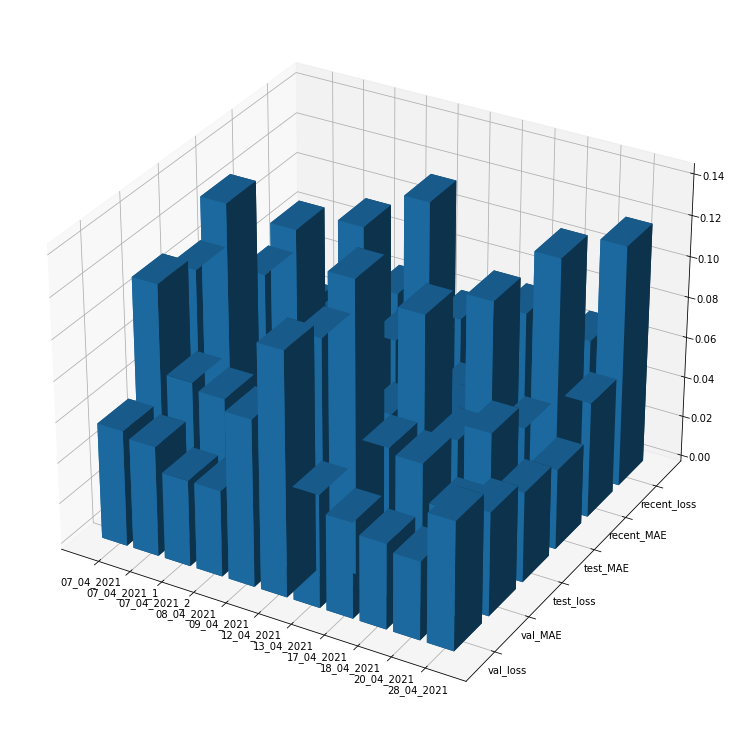

In [302]:
from mpl_toolkits.mplot3d import Axes3D

dx, dy = .8, .8

fig = plt.figure(figsize=(15,10))
ax = Axes3D(fig)
 
xpos=np.arange(to_plot_lstm_bidi.shape[0])
ypos=np.arange(to_plot_lstm_bidi.shape[1])

ax.set_xticks(xpos + dx/2)
ax.set_yticks(ypos + dy/2)

xpos, ypos = np.meshgrid(xpos, ypos)
xpos = xpos.flatten()
ypos = ypos.flatten()

zpos=np.zeros(to_plot_lstm_bidi.shape).flatten()

dz = to_plot_lstm_bidi.values.ravel()

ax.bar3d(xpos,ypos,zpos,dx,dy,dz)

ax.w_yaxis.set_ticklabels(to_plot_lstm_bidi.columns)
ax.w_xaxis.set_ticklabels(lstm_bidi_res.Directory_name)

plt.show()


In [303]:
k

NameError: name 'k' is not defined

## Plot my PCT comparsion

In [338]:
pct_results_my = pd.read_excel("models_comparsion.xlsx" , skiprows = 158, nrows= 125 , usecols="D,U:Y")  
pct_results_my.dropna(thresh=3, inplace=True)
pct_results_my.rename(columns={"Directory":"Iter_name"}, inplace=True)

In [339]:
pct_results_my.fillna(method='ffill', inplace=True)

In [340]:
pct_results_my = pct_results_my[pct_results_my["Iter_name"] != "19_04_2021"]

In [341]:
pct_results_my.style.background_gradient(cmap="RdYlGn_r", axis="rows")

,Cells,Iter_name,MAE (org),Direction (org),MAE (new),Direction (new)
0,LSTM,07_04_2021,0.487910,56.960000,0.357370,56.810000
1,LSTM - bidirectional,07_04_2021,0.449400,50.940000,0.350370,45.620000
2,GRU,07_04_2021,0.496740,51.840000,0.398930,50.230000
3,GRU - bidirectional,07_04_2021,0.453400,41.540000,0.349030,43.350000
4,LSTM (single),07_04_2021,0.465410,58.540000,0.352480,56.740000
5,LSTM - bidirectional (single),07_04_2021,0.461910,58.540000,0.352150,55.830000
6,GRU (single),07_04_2021,0.454070,58.160000,0.349370,54.450000
7,GRU - bidirectional (single),07_04_2021,0.472740,50.330000,0.361040,52.210000
9,LSTM,07_04_2021_1,0.467070,53.730000,0.344920,52.320000
10,LSTM - bidirectional,07_04_2021_1,0.466570,54.660000,0.344030,52.730000


In [368]:
pct_results_my.style.highlight_max(color="#98FB98")

,Cells,Iter_name,MAE (org),Direction (org),MAE (new),Direction (new)
0,LSTM,07_04_2021,0.487910,56.960000,0.357370,56.810000
1,LSTM - bidirectional,07_04_2021,0.449400,50.940000,0.350370,45.620000
2,GRU,07_04_2021,0.496740,51.840000,0.398930,50.230000
3,GRU - bidirectional,07_04_2021,0.453400,41.540000,0.349030,43.350000
4,LSTM (single),07_04_2021,0.465410,58.540000,0.352480,56.740000
5,LSTM - bidirectional (single),07_04_2021,0.461910,58.540000,0.352150,55.830000
6,GRU (single),07_04_2021,0.454070,58.160000,0.349370,54.450000
7,GRU - bidirectional (single),07_04_2021,0.472740,50.330000,0.361040,52.210000
9,LSTM,07_04_2021_1,0.467070,53.730000,0.344920,52.320000
10,LSTM - bidirectional,07_04_2021_1,0.466570,54.660000,0.344030,52.730000


array([<AxesSubplot:title={'center':'MAE (org)'}>,
       <AxesSubplot:title={'center':'Direction (org)'}>,
       <AxesSubplot:title={'center':'MAE (new)'}>,
       <AxesSubplot:title={'center':'Direction (new)'}>], dtype=object)

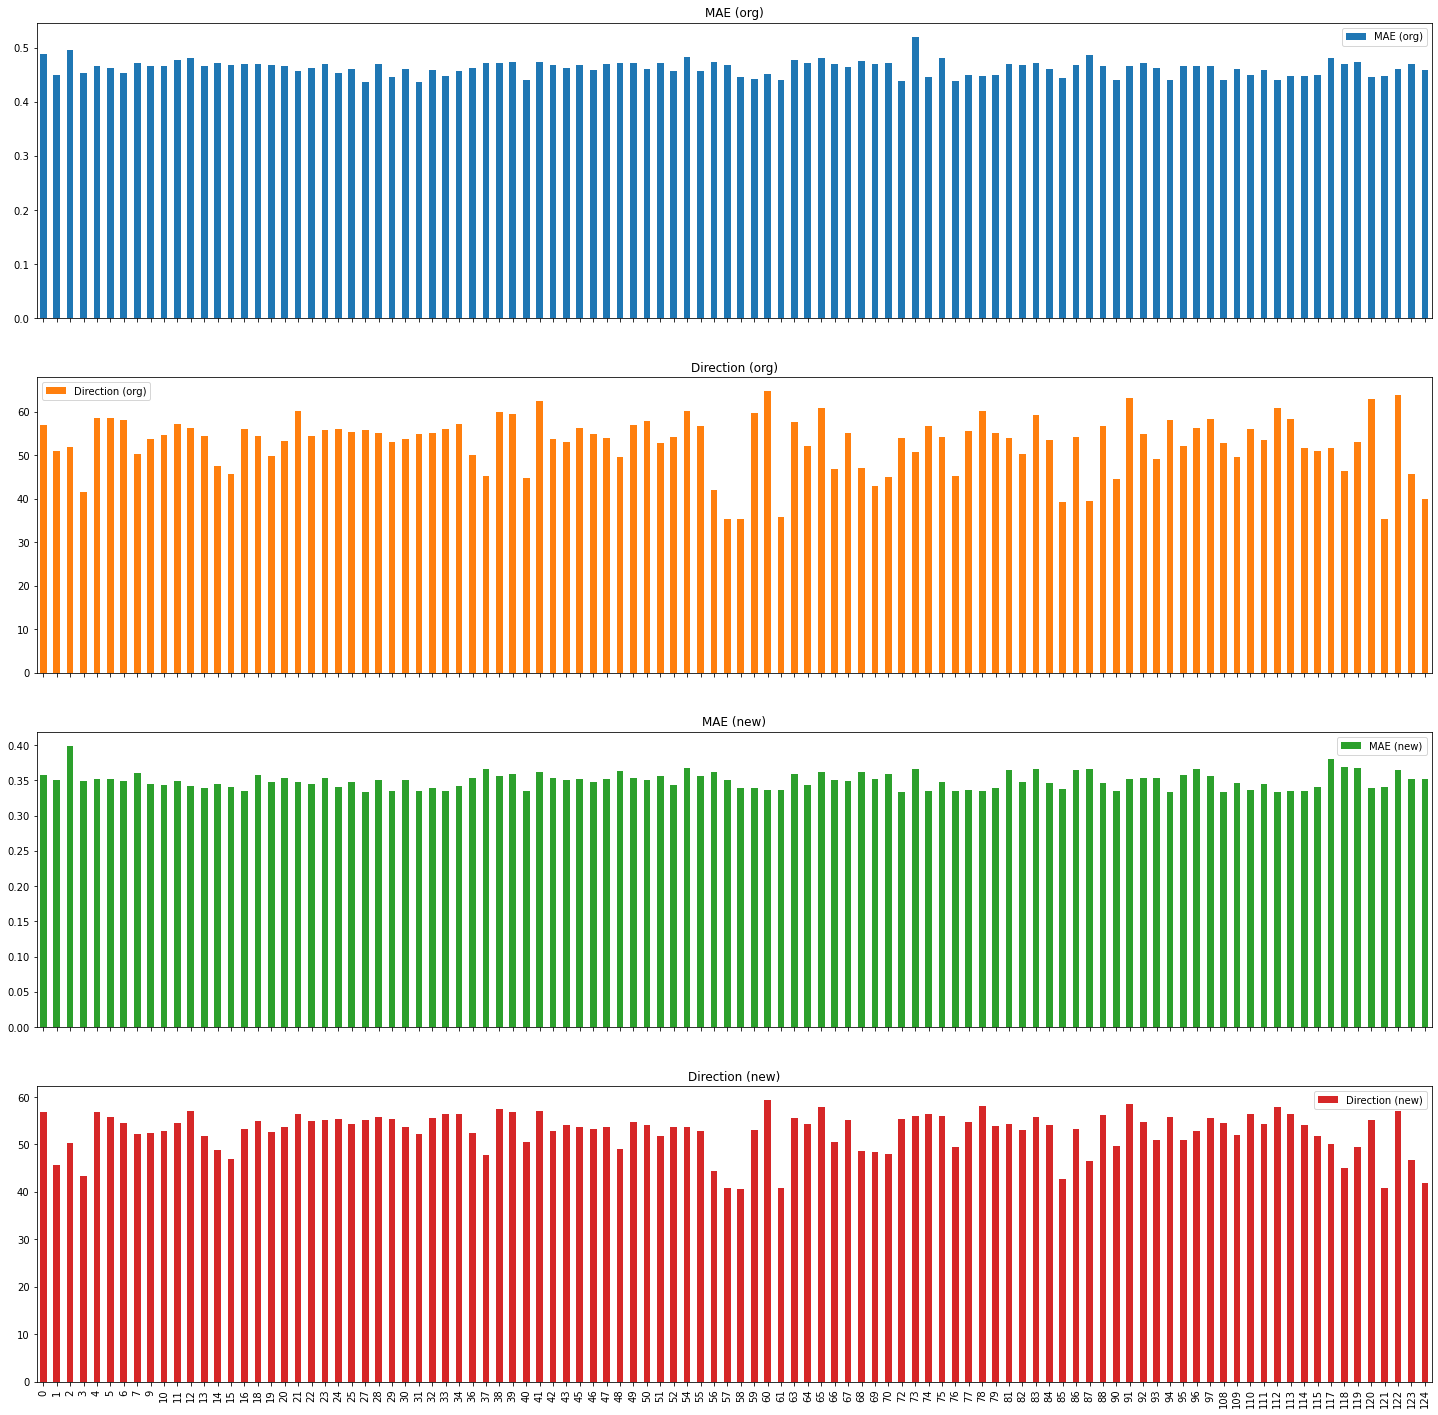

In [343]:
pct_results_my.plot.bar(figsize=(25,25), subplots=True)

## Compare cells 

In [344]:
lstm = pct_results_my.loc[pct_results_my["Cells"] == "LSTM"].copy()
lstm.drop(columns=["Iter_name","Cells"], inplace=True)
lstm_res = lstm.sum()
lstm.sum()

MAE (org)            6.02408
Direction (org)    702.38000
MAE (new)            4.57200
Direction (new)    698.43000
dtype: float64

In [345]:
lstm_bidi = pct_results_my.loc[pct_results_my["Cells"] == "LSTM - bidirectional"].copy()
lstm_bidi.drop(columns=["Iter_name","Cells"], inplace=True)
lstm_bidi_res = lstm_bidi.sum()
lstm_bidi.sum()

MAE (org)            6.10113
Direction (org)    679.87000
MAE (new)            4.58535
Direction (new)    679.43000
dtype: float64

In [346]:
gru = pct_results_my.loc[pct_results_my["Cells"] == "GRU"].copy()
gru.drop(columns=["Iter_name","Cells"], inplace=True)
gru_res = gru.sum()
gru.sum()

MAE (org)            6.09345
Direction (org)    712.19000
MAE (new)            4.62223
Direction (new)    699.78000
dtype: float64

In [347]:
gru_bidi = pct_results_my.loc[pct_results_my["Cells"] == "GRU - bidirectional"].copy()
gru_bidi.drop(columns=["Iter_name","Cells"], inplace=True)
gru_bidi_res = gru_bidi.sum()
gru_bidi.sum()

MAE (org)            6.04226
Direction (org)    676.36000
MAE (new)            4.54410
Direction (new)    678.22000
dtype: float64

In [348]:
lstm_s = pct_results_my.loc[pct_results_my["Cells"] == "LSTM (single)"].copy()
lstm_s.drop(columns=["Iter_name","Cells"], inplace=True)
lstm_s_res = lstm_s.sum()
lstm_s.sum()

MAE (org)            5.865421
Direction (org)    653.430000
MAE (new)            4.426320
Direction (new)    663.580000
dtype: float64

In [349]:
lstm_bidi_s = pct_results_my.loc[pct_results_my["Cells"] == "LSTM - bidirectional (single)"].copy()
lstm_bidi_s.drop(columns=["Iter_name","Cells"], inplace=True)
lstm_bidi_s_res = lstm_bidi_s.sum()
lstm_bidi_s.sum()

MAE (org)            6.00778
Direction (org)    728.60000
MAE (new)            4.56124
Direction (new)    700.73000
dtype: float64

In [350]:
gru_s = pct_results_my.loc[pct_results_my["Cells"] == "GRU (single)"].copy()
gru_s.drop(columns=["Iter_name","Cells"], inplace=True)
gru_s_res = gru_s.sum()
gru_s.sum()

MAE (org)            6.00027
Direction (org)    683.59000
MAE (new)            4.51729
Direction (new)    683.58000
dtype: float64

In [351]:
gru_bidi_s = pct_results_my.loc[pct_results_my["Cells"] == "GRU - bidirectional (single)"].copy()
gru_bidi_s.drop(columns=["Iter_name","Cells"], inplace=True)
gru_bidi_s_res = gru_bidi_s.sum()
gru_bidi_s.sum()

MAE (org)            5.98161
Direction (org)    668.12000
MAE (new)            4.51055
Direction (new)    672.03000
dtype: float64

### MAE

#### Compare MAE (org)

In [352]:
results_MAE = [lstm_res["MAE (org)"], lstm_bidi_res["MAE (org)"], gru_res["MAE (org)"], gru_bidi_res["MAE (org)"], lstm_s_res["MAE (org)"], lstm_bidi_s_res["MAE (org)"], gru_s_res["MAE (org)"], gru_bidi_s_res["MAE (org)"]]
results_MAE_df = pd.DataFrame(results_MAE, index=["LSTM","LSTM - bidirectional","GRU","GRU - bidirectional","LSTM (single)","LSTM - bidirectional (single)","GRU (single)","GRU - bidirectional (single)"], columns = ["MAE (org)"])

<AxesSubplot:ylabel='MAE sum'>

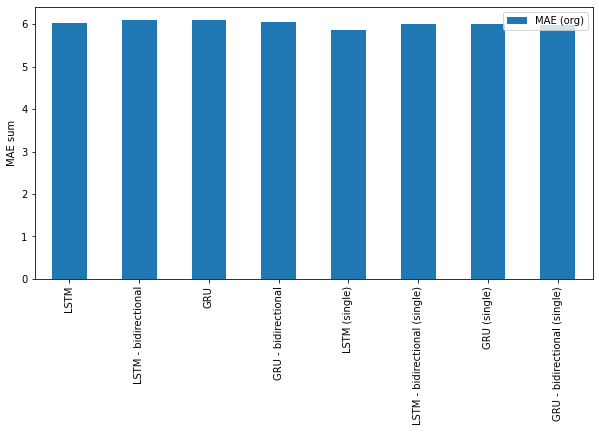

In [353]:
results_MAE_df.plot.bar(figsize=(10,5), ylabel="MAE sum")

#### Compare MAE (new)

In [354]:
results_MAE_new = [lstm_res["MAE (new)"], lstm_bidi_res["MAE (new)"], gru_res["MAE (new)"], gru_bidi_res["MAE (new)"], lstm_s_res["MAE (new)"], lstm_bidi_s_res["MAE (new)"], gru_s_res["MAE (new)"], gru_bidi_s_res["MAE (new)"]]
results_MAE_df_new = pd.DataFrame(results_MAE_new, index=["LSTM","LSTM - bidirectional","GRU","GRU - bidirectional","LSTM (single)","LSTM - bidirectional (single)","GRU (single)","GRU - bidirectional (single)"], columns = ["MAE (new)"])

<AxesSubplot:ylabel='MAE sum'>

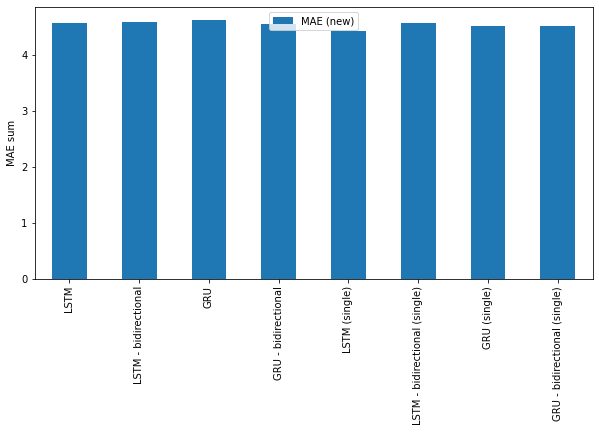

In [355]:
results_MAE_df_new.plot.bar(figsize=(10,5), ylabel="MAE sum")

#### MAE combination

In [356]:
MAE_comb_df = pd.DataFrame({"MAE (org)":results_MAE,"MAE (new)":results_MAE_new}, index=["LSTM","LSTM - bidirectional","GRU","GRU - bidirectional","LSTM (single)","LSTM - bidirectional (single)","GRU (single)","GRU - bidirectional (single)"])

In [357]:
MAE_comb_df["MAE sum"] = MAE_comb_df["MAE (org)"] + MAE_comb_df["MAE (new)"]
MAE_comb_df.style.background_gradient(cmap="RdYlGn_r", axis="rows")

,MAE (org),MAE (new),MAE sum
LSTM,6.024080,4.572000,10.596080
LSTM - bidirectional,6.101130,4.585350,10.686480
GRU,6.093450,4.622230,10.715680
GRU - bidirectional,6.042260,4.544100,10.586360
LSTM (single),5.865421,4.426320,10.291741
LSTM - bidirectional (single),6.007780,4.561240,10.569020
GRU (single),6.000270,4.517290,10.517560
GRU - bidirectional (single),5.981610,4.510550,10.492160


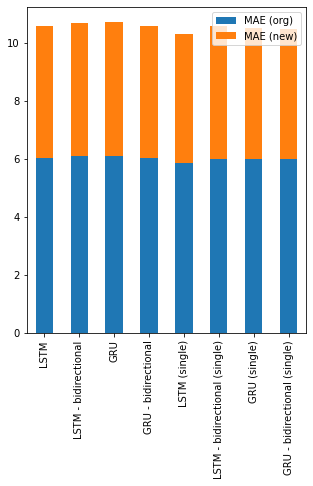

In [358]:
ax = MAE_comb_df[["MAE (org)","MAE (new)"]].plot.bar(figsize=(5,6), stacked=True)

### Average Direction

#### Org

In [359]:
avg = lstm.shape[0]

<AxesSubplot:ylabel='Direction sum'>

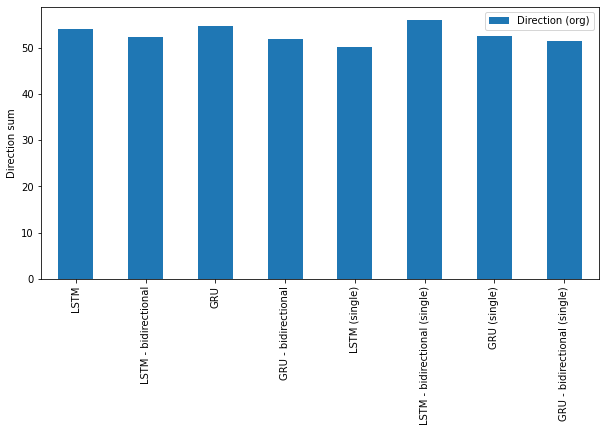

In [360]:
results_DIRECTION = [lstm_res["Direction (org)"]/avg, lstm_bidi_res["Direction (org)"]/avg, gru_res["Direction (org)"]/avg, gru_bidi_res["Direction (org)"]/avg, lstm_s_res["Direction (org)"]/avg, lstm_bidi_s_res["Direction (org)"]/avg, gru_s_res["Direction (org)"]/avg, gru_bidi_s_res["Direction (org)"]/avg]
results_DIRECTION_df = pd.DataFrame(results_DIRECTION, index=["LSTM","LSTM - bidirectional","GRU","GRU - bidirectional","LSTM (single)","LSTM - bidirectional (single)","GRU (single)","GRU - bidirectional (single)"], columns = ["Direction (org)"])

results_DIRECTION_df.plot.bar(figsize=(10,5), ylabel="Direction sum")

#### New

<AxesSubplot:ylabel='Direction sum'>

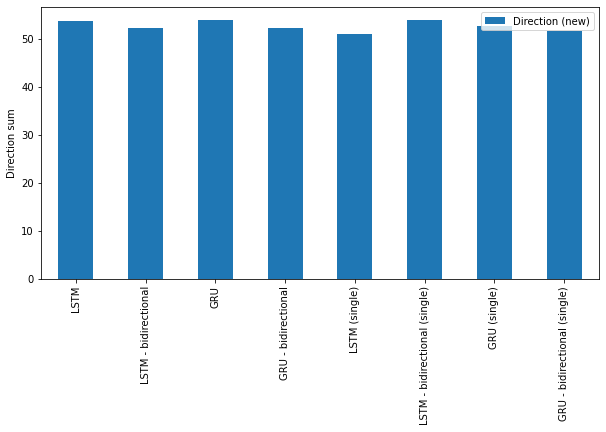

In [361]:
results_DIRECTION_new = [lstm_res["Direction (new)"]/avg, lstm_bidi_res["Direction (new)"]/avg, gru_res["Direction (new)"]/avg, gru_bidi_res["Direction (new)"]/avg, lstm_s_res["Direction (new)"]/avg, lstm_bidi_s_res["Direction (new)"]/avg, gru_s_res["Direction (new)"]/avg, gru_bidi_s_res["Direction (new)"]/avg]
results_DIRECTION_df_new = pd.DataFrame(results_DIRECTION_new, index=["LSTM","LSTM - bidirectional","GRU","GRU - bidirectional","LSTM (single)","LSTM - bidirectional (single)","GRU (single)","GRU - bidirectional (single)"], columns = ["Direction (new)"])

results_DIRECTION_df_new.plot.bar(figsize=(10,5), ylabel="Direction sum")

### Combination

In [362]:
DIRECTION_comb_df = pd.DataFrame({"Direction (org)":results_DIRECTION,"Direction (new)":results_DIRECTION_new}, index=["LSTM","LSTM - bidirectional","GRU","GRU - bidirectional","LSTM (single)","LSTM - bidirectional (single)","GRU (single)","GRU - bidirectional (single)"])

In [363]:
DIRECTION_comb_df["Direction sum"] = (DIRECTION_comb_df["Direction (org)"] + results_DIRECTION_df_new["Direction (new)"])/2
DIRECTION_comb_df.style.background_gradient(cmap="RdYlGn", axis="rows")

,Direction (org),Direction (new),Direction sum
LSTM,54.029231,53.725385,53.877308
LSTM - bidirectional,52.297692,52.263846,52.280769
GRU,54.783846,53.829231,54.306538
GRU - bidirectional,52.027692,52.170769,52.099231
LSTM (single),50.263846,51.044615,50.654231
LSTM - bidirectional (single),56.046154,53.902308,54.974231
GRU (single),52.583846,52.583077,52.583462
GRU - bidirectional (single),51.393846,51.694615,51.544231


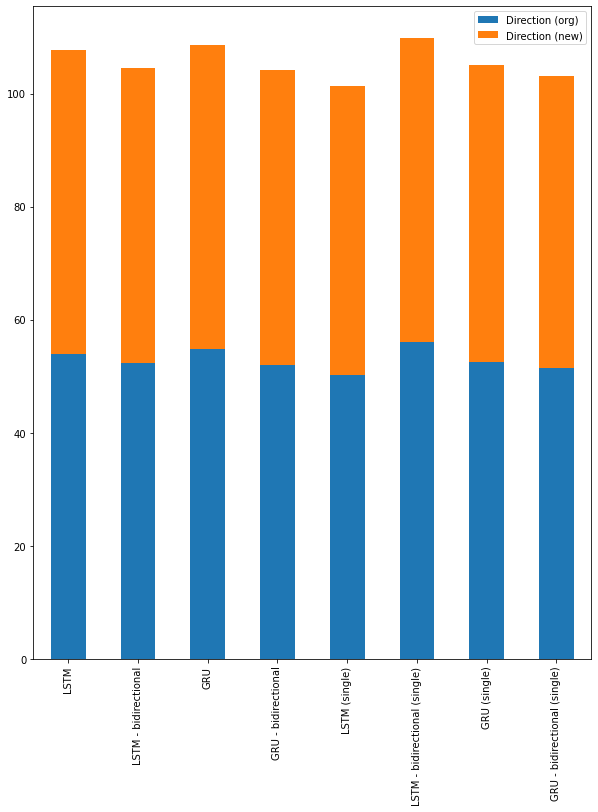

In [364]:
ax = DIRECTION_comb_df[["Direction (org)","Direction (new)"]].plot.bar(figsize=(10,12), stacked=True)

## Big models

In [365]:
pct_results_big = pd.read_excel("models_comparsion.xlsx" , skiprows = 287, nrows= 8 , usecols="D,V:W")  
pct_results_big.rename(columns={"Directory":"Iter_name"}, inplace=True)

In [366]:
pct_results_big.style.background_gradient(cmap="RdYlGn", axis="rows")

,BTC/OCEAN/ZRX/ATOM/BNT/ALGO/TWT/SUSHI/BAT,MAE big,Direction
0,LSTM,0.418140,51.200000
1,LSTM - bidirectional,0.418340,49.880000
2,GRU,0.418040,50.650000
3,GRU - bidirectional,0.418140,50.490000
4,LSTM (single),0.418040,49.670000
5,LSTM - bidirectional (single),0.418140,49.390000
6,GRU (single),0.418340,50.340000
7,GRU - bidirectional (single),0.418040,50.610000


In [367]:
pct_results_big.style.background_gradient(cmap="RdYlGn_r", axis="rows")

,BTC/OCEAN/ZRX/ATOM/BNT/ALGO/TWT/SUSHI/BAT,MAE big,Direction
0,LSTM,0.418140,51.200000
1,LSTM - bidirectional,0.418340,49.880000
2,GRU,0.418040,50.650000
3,GRU - bidirectional,0.418140,50.490000
4,LSTM (single),0.418040,49.670000
5,LSTM - bidirectional (single),0.418140,49.390000
6,GRU (single),0.418340,50.340000
7,GRU - bidirectional (single),0.418040,50.610000
